# PfDA Assignment 2 2023

## An analysis of paleo-present climate data 

<img src = images/climate_montage.png alt= "Climate change Images" width = "700" height = "auto">

# Table of Contents
1. [Introduction](#overview)  
    - [Problem Statement](#problem-statement)
    - [Background](#background)
    - [Import](#import-libraries)
2. [CO2 Data](#co2-data)
3. [Temperature Data](#temp-data)
4. [Analysis of CO2 and Temperature Anomoly](#co2-temp-analysis)
5. [CH4 Data](#ch4-data)
6. [Irish Context](#irish-context)
7. [Export Fused Data](#export-data)

***

<a id="overview"></a>

## 1. Introduction and Project Overview

This notebook contains my submission for the Programming for Data Analysis Module 2023 module at ATU as part of the Higher Diploma in Computing and Data Analytics.

### Problem statement <a id="problem-statement"></a>

- Analyse CO2 vs Temperature Anomaly from 800kyrs – present. 
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage) 
- Examine Irish context: o Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13) 
- Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats 
- For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis). 
- Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue  
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage) 

Use a Jupyter notebook for your analysis and track your progress using GitHub. 

Use an academic referencing style 

### Background <a id="background"></a>

Paleoclimatology is the study of previous climates that have existed during Earth's different geologic ages.  We can then use data gathered to try to identify the causes of climate changes that have happened in the past in order to better understand our present and future climate.

Paleoclimatology has also helped scientists study and understand how other environmental factors, such as continental drift, solar energy, greenhouses gases in the atmosphere, and the variation in Earth’s orbit have all affected the climate of Earth over time.

The science of paleoclimatology is vital to our understanding of climate on Earth. As scientists become increasingly aware of how climates have been influenced in the past, they can develop models that help predict how increased carbon dioxide levels and other changes might impact the climate of Earth in the future.

https://education.nationalgeographic.org/resource/paleoclimatology-RL/

### Importing Python libraries and modules <a id="import-libraries"></a>

In [169]:
# Importing libraries and modules necessary for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import datetime as dt
import math
from scipy import signal



## 2. CO2 Data <a id="co2-data"></a>

The CO2 data being analysed at is a composite of atmospheric CO2 records from Antartic ice cores and can be found in this reposoitory as a .xls file [CO2_IPCC](/Data/CO2_IPCC.xls).  The data in this file spans a timeframe of 800k years before present, where present date is 1950.  This version compiled by Bereiter et al. in 2014 replaces the old version of Lüthi et al. (2008), which contains the analytical bias described in the article mentioned above and lower quality data and many other sections.

The ice core data is gathered by drilling into ice sheets and extracting ice core samples which are then analysed to identify deposits within the ice, such as pollen and gas.  By drilling down into the ice sheet or glacier and recovering ice from ancient times, scientists are able to determine the past composition and behavior of the atmosphere, what the climate was like when the snow fell, and how the size of ice sheets and glaciers have changed in the past in response to different climate conditions. Ice cores have provided climate and ice dynamics information over many hundred thousand years in very high, sometimes seasonal, resolution.

The information gathered from these ice cores allows paleoclimatologists to better understand atmospheric and climatic conditions that existed when particular layers of the sheet formed and to determine how and why climate changed in the past.


In [ ]:
# Read in the CO2 data from IPCC xls file, skipping the first 14 rows. 
# https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls

co2_IPCC = pd.read_excel('data/CO2_IPCC.xls', sheet_name='CO2 Composite', skiprows=range(14))

In [ ]:
co2_IPCC.head()

In [ ]:
co2_IPCC.describe()


https://en.wikipedia.org/wiki/Before_Present

In order to make the data more relateable and easier to compare with the other datasets I will convert the column 'Gasage (yr BP)' to the same year format that is seen in the other datasets.


In [ ]:
# Convert the Gasage yr BP format 
years = 1950 - co2_IPCC['Gasage (yr BP)']

In [ ]:
# Add a new column to the dataframe with the converted year
co2_IPCC.loc[:, "year"] = (years).astype(int)

As the IPCC dataset only contains data up until 1950 a second dataset is also being used and can be found in this repository as a .csv file [CO2_Mauna_Loa](/Data/co2_mauna_loa.csv) and was downloaded from the [NOAA website](https://gml.noaa.gov/ccgg/trends/data.html).  The data gathered at the Mauna Loa Observatory in Hawaii gives the annual mean CO2 measurements but unlike the IPCC data which gathers the CO2 data from ice cores the data is collected from measuring concentration of CO2 in the air.  

The location of the observatory at an altitude of 3,400m, near the summit of Mauna Loa, is well situated to measure air masses that are representative of very large areas.

https://gml.noaa.gov/ccgg/about/co2_measurements.html

In [ ]:
# Read in the CO2 data from Mauna Loa .csv file, skipping the first 43 rows. 
# https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls

co2_maunaloa = pd.read_csv('data/co2_mauna_loa.csv', skiprows=range(43))

In [ ]:
co2_maunaloa.describe()

In order to analyse the 2 data sets they will need to be merged.

In [ ]:
# Change the name of the column in Mauna Loa csv file to match that of IPCC file
# https://stackoverflow.com/questions/46066685/rename-the-column-inside-csv-file
co2_maunaloa = co2_maunaloa.rename(columns=({'mean':'CO2 (ppmv)'}))


In [ ]:
# https://pandas.pydata.org/docs/user_guide/merging.html
co2_relevant_columns = co2_maunaloa[['year', 'CO2 (ppmv)']]

co2_merged = pd.concat([co2_relevant_columns, co2_IPCC[['year', 'CO2 (ppmv)']]])
co2_merged = co2_merged.sort_values(by='year') 

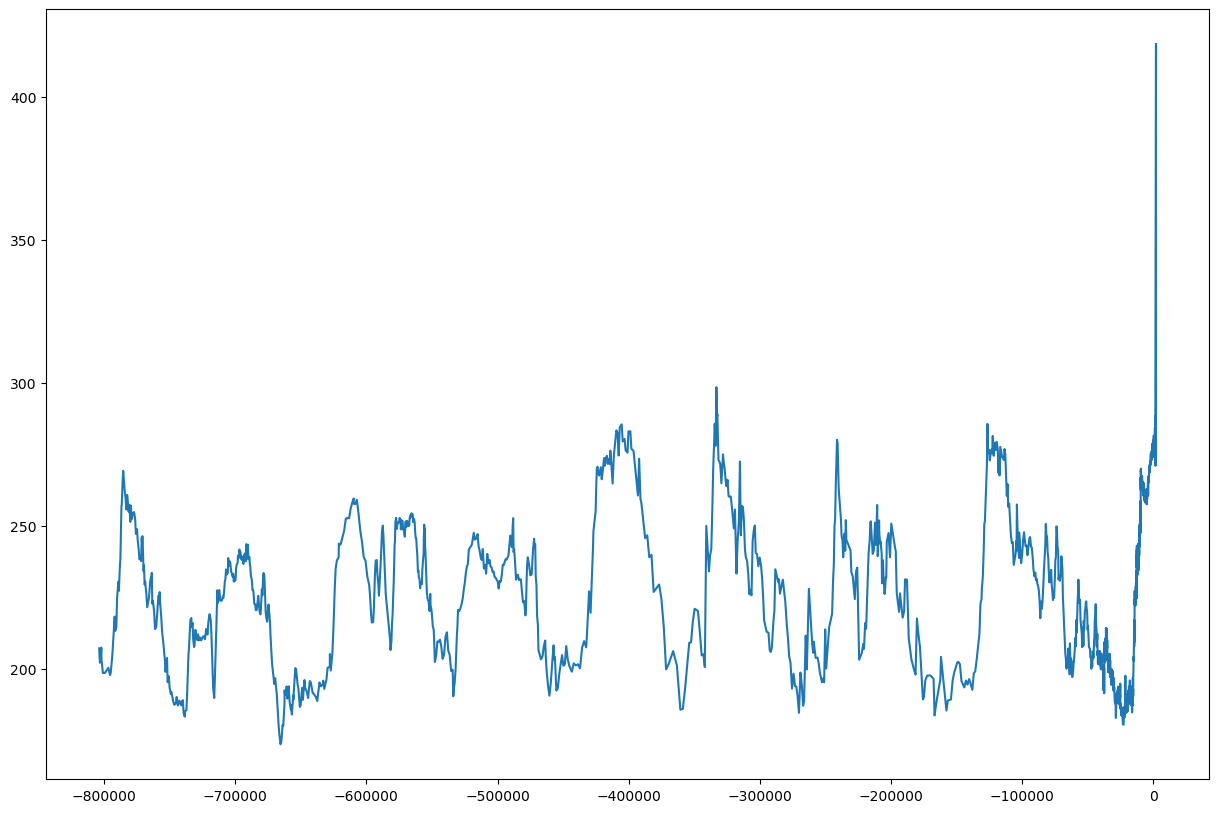

In [168]:
# Check how the merged CO2 data looks
plt.figure(figsize=(15,10))
plt.plot(co2_merged['year'],co2_merged['CO2 (ppmv)'])
plt.show()

## 3. Temperature Data <a id="temp-data"></a>

The next section will focus on the data relating to temperature and temperature anomoly.  

The term temperature anomoly means a departure from a reference value or long-term average. A positive anomaly indicates that the observed temperature was warmer than the reference value, while a negative anomaly indicates that the observed temperature was cooler than the reference value. https://www.ncei.noaa.gov/access/monitoring/global-temperature-anomalies/#:~:text=The%20term%20temperature%20anomaly%20means,cooler%20than%20the%20reference%20value.

The temperature data being analysed was provided by the lecturer and can be found in this reposoitory as a .txt file [temp_data_jouzel](/Data/temp_data_jouzel.txt).  Similar to the CO2 data this dataset spans a timescale of over 800k years and also uses the Before Present model where BP is 1950.  

In [ ]:
# Read in the CO2 data from Jouzel txt file
# Change the name of the 'Age' column to match that on CO2 merged data
# Remove any null values using.dropna() function
temp = pd.read_csv('data/temp_data_Jouzel.txt', sep='\s+', skiprows=range(91))
#temp = temp.rename(columns=({'Age':'year'})) 
temp = temp.dropna()


In [ ]:
# Convert the year from BP to the same format as the CO2 
years = 1950 - temp['Age']
temp.loc[:, "year"] = (years).astype(int)

In [ ]:
temp.describe()


From the above we can see that the min value for 'year' is 38 BP whoich means this data only contains data until 1911 so in order to complete the data up until the current year I found data on the NOAA website which has the temperature anomaly from 1912 to 2023. 

https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/11/1912-2023


In [ ]:
temp_NOAA = pd.read_csv('data/temp_data_NOAA.csv', skiprows=range(4))
temp_NOAA = temp_NOAA.rename(columns=({'Year':'year', 'Anomaly':'Temperature'})) 
temp_NOAA.describe()


In [ ]:
temp_merged = pd.concat([temp_NOAA, temp[['year', 'Temperature']]])
temp_merged = temp_merged.sort_values(by='year') 
temp_merged.describe()

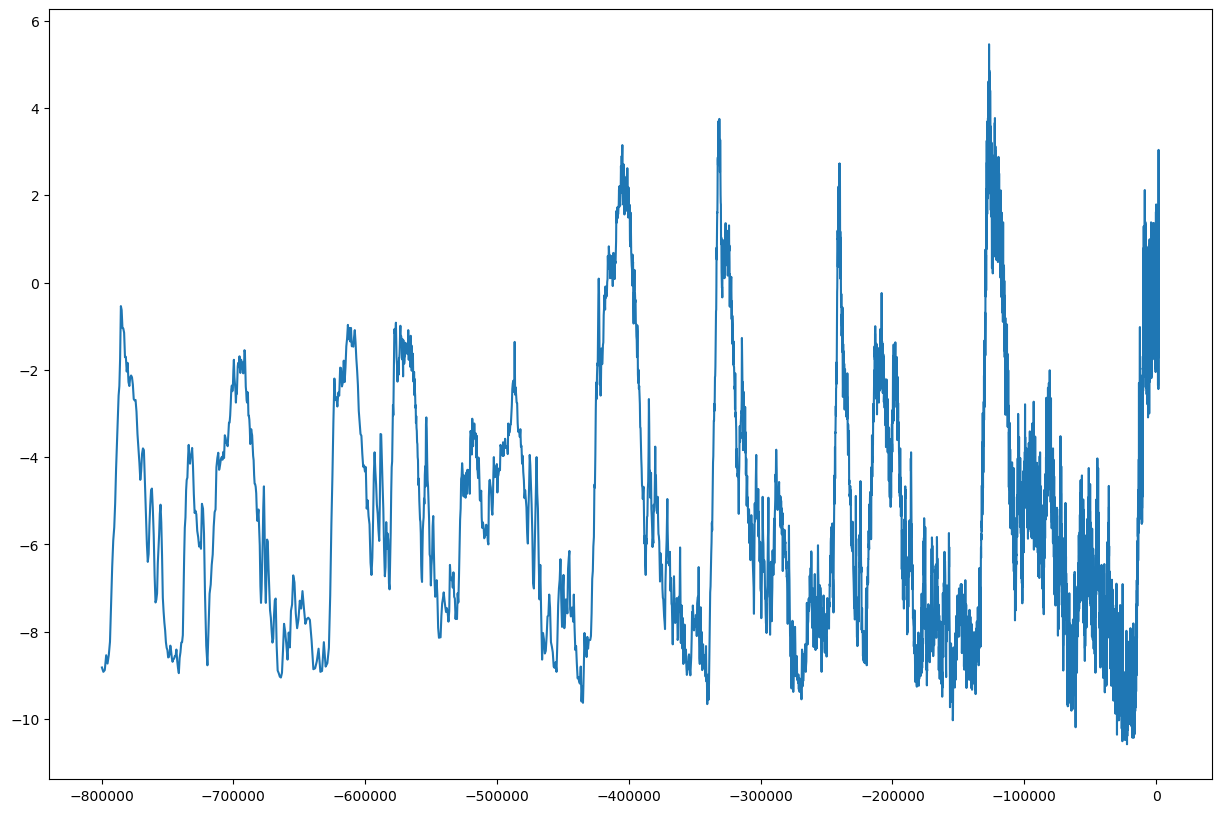

In [132]:
# Check how the merged temp data looks
plt.figure(figsize=(15,10))
plt.plot(temp_merged['year'],temp_merged['Temperature'])
plt.show()

## 4. Analysis of CO2 and Temperature Anomoly <a id="co2-temp-analysis"></a>


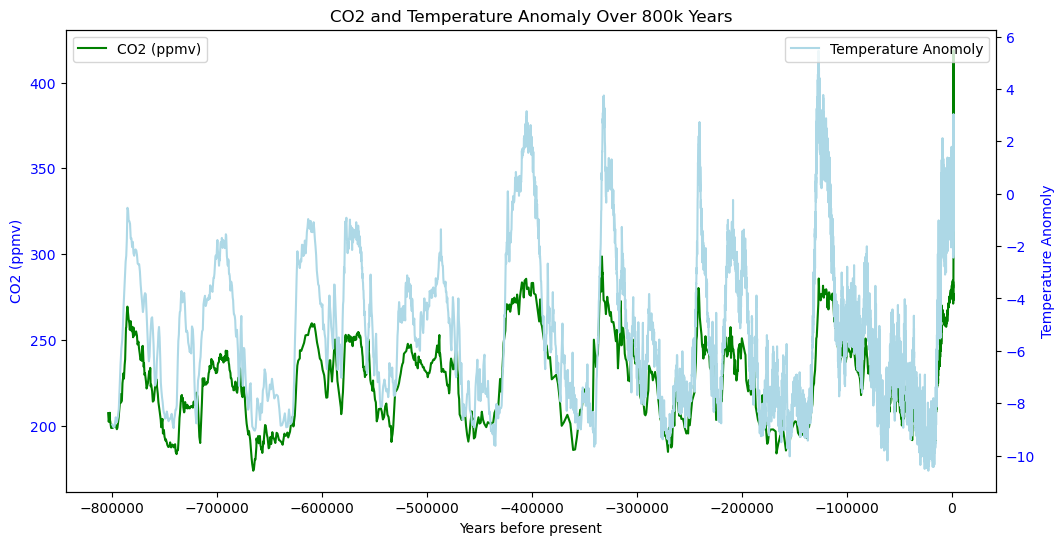

In [167]:
# Create a plot that displays merged CO2 and temp datasets
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2=ax1.twinx()

# Plot CO2 data
ax1.plot(co2_merged['year'], co2_merged['CO2 (ppmv)'], label='CO2 (ppmv)', color='green')
ax1.set_ylabel('CO2 (ppmv)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.set_xlabel('Years before present')


# Plot temperature data
ax2.plot(temp_merged['year'], temp_merged['Temperature'], label='Temperature Anomoly', color='lightblue')
ax2.set_ylabel('Temperature Anomoly', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

plt.title('CO2 and Temperature Anomaly Over 800k Years')
plt.show()

<img src = images/CO2vsTemp.png alt= "CO2 vs Temp " width = "700" height = "auto">

https://skepticalscience.com/co2-lags-temperature.htm

https://skepticalscience.com/images/Milankovitch_Cycles_400000.gif



### Trend

The relationship between CO2 measurements and temperature anomoly is a key aspect of climate science with lots of research pointing to the strong correlation between the increasing CO2 levels and the rise in annual global temperatures.  The scientific consensus is that human activities, particularly the burning of fossil fuels, have led to a significant increase in CO2 concentrations, contributing to the observed global warming.  This consensus is reflected in reports by major scientific organizations, including the IPCC.[1]

While it is widely accepted that CO2 is a major contributor, human activities and other greenhouse gases also play roles in impact on global temperatures.

> [1] https://www.ipcc.ch/report/ar6/wg3/downloads/report/IPCC_AR6_WGIII_SPM.pdf

### Temporal leads/lags

Changes in global atmospheric CO2 are lagging 9.5–10 months behind changes in global air surface temperature. [1]


https://machinehack.com/story/what-is-the-lead-lag-effect-and-how-is-it-used-in-statistics

https://www.sciencedirect.com/science/article/abs/pii/S0921818112001658#:~:text=The%20maximum%20positive%20correlation%20between,to%20global%20lower%20troposphere%20temperature.


> ###### [1] Heilig, G.K. The phase relation between atmospheric carbon dioxide and global temperature (2013).https://doi.org/10.1016/j.gloplacha.2012.08.008


In [177]:
# https://stackoverflow.com/questions/69117617/how-to-find-the-lag-between-two-time-series-using-cross-correlation

x = temp_merged
y = co2_merged
correlation = signal.correlate(x-np.mean(x, axis=0), y - np.mean(y, axis=0), mode="full")
lags = signal.correlation_lags(len(x), len(y), mode="full")
lag = lags[np.argmax(abs(correlation))]

print(lag)


3929


## 5. CH4 Data <a id="ch4-data"></a>

CH4 (Methane) is an important greenhouse gas, responsible for around 30% of the rise in global temperatures since the industrial revolution. (https://en.wikipedia.org/wiki/Methane) "https://www.iea.org/reports/global-methane-tracker-2022/methane-and-climate-change Methane and climate change – Global Methane Tracker 2022 – Analysis". IEA. 2022. Retrieved September 18, 2023.

Methane is a naturally occuring atmospheric gas and is found both below ground and under the seafloor being formed by both geological and biological processes.  In addition to naturally occuring methane it is also a by product from activities such as waster water treatment plants, manure production, biomass burning and landfills. (https://www.pranaair.com/what-is-methane/)

The Earth's atmospheric methane concentration has increased by about 160% since 1750, with the overwhelming percentage caused by human activity.(https://en.wikipedia.org/wiki/Methane)

The first dataset is from the NOAA website and can be found in this repository as a .txt file [CH4_EPICA](/Data/ch4_EPICA.txt) and was downloaded from the [NOAA website](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt).  

In [ ]:
# Read in the CH4 data from EPICA txt file
# Remove any null values using.dropna() function
ch4_EPICA = pd.read_csv('data/ch4_EPICA.txt', skiprows=153, sep='\\s+')
ch4_EPICA = ch4_EPICA.dropna()

In [ ]:
# Change the format on the 'Age' columns to match the format used for c02 and temp dataframes
years = 1950 - ch4_EPICA['Age']
ch4_EPICA.loc[:, "year"] = (years).astype(int)

In [136]:
ch4_EPICA.describe()

,Depth,Age,mean,1s,year
count,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000
mean,1878.243642,270905.078459,519.970043,10.053780,-268955.078459
std,1022.330187,243182.183065,88.047494,0.615278,243182.183065
min,99.340000,13.000000,342.000000,10.000000,-797446.000000
25%,818.430000,44282.500000,450.000000,10.000000,-426365.000000
50%,2235.230000,225906.000000,509.000000,10.000000,-223956.000000
75%,2786.265000,428315.000000,589.000000,10.000000,-42332.500000
max,3190.530000,799396.000000,907.000000,22.200000,1937.000000


As we can see this dataset only contains records as far as 1937 so a second dataset which was again sourced from the NOAA website (https://gml.noaa.gov/ccgg/trends_ch4/) and can be found in this repository as a .txt file [CH4_NOAA](/Data/ch4_NOAA.txt).  

In [ ]:
# Read in the CH4 data from NOAA txt file
# Remove any null values using.dropna() function
ch4_NOAA = pd.read_csv('data/ch4_NOAA.txt', skiprows=45, sep='\\s+')
ch4_NOAA = ch4_NOAA.dropna()

In [ ]:
# Merging both CH4 datasets
ch4_relevant_columns = ch4_EPICA[['year', 'mean']]

ch4_merged = pd.concat([ch4_relevant_columns, ch4_NOAA])
ch4_merged = ch4_merged.sort_values(by='year') 
ch4_merged.describe()

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(ch4_merged['year'],ch4_merged['mean'])
plt.show()

In [144]:
temp_after2000=temp_merged[temp_merged["year"] > 1900]
co2_after2000=co2_merged[co2_merged["year"] > 1900]
ch4_after2000=ch4_merged[ch4_merged["year"] > 1900]

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(temp_after2000['year'], temp_after2000['Temperature'], color = "blue")
#plt.plot(co2_after2000['year'], co2_after2000['CO2 (ppmv)'], color = "darkslategrey")
#plt.plot(ch4_after2000['year'],ch4_after2000['mean'], color = "red")
plt.grid(True, linestyle=':', color='lightgrey')
plt.show()

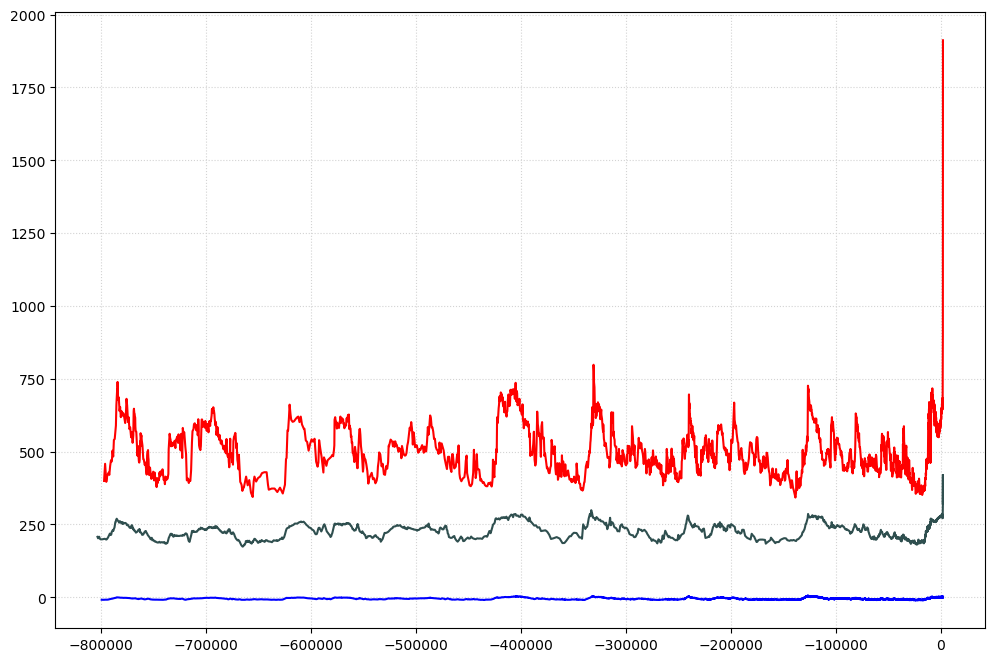

In [138]:
plt.figure(figsize=(12,8))
plt.plot(temp_merged['year'], temp_merged['Temperature'], color = "blue")
plt.plot(co2_merged['year'], co2_merged['CO2 (ppmv)'], color = "darkslategrey")
plt.plot(ch4_merged['year'],ch4_merged['mean'], color = "red")
plt.grid(True, linestyle=':', color='lightgrey')
plt.show()

## 6. Irish Context <a id="irish-context"></a>


https://climateknowledgeportal.worldbank.org/country/ireland


In [ ]:
irish_temp = pd.read_csv('data/irish_temp.csv')


In [ ]:
plt.figure(figsize=(12,8))
plt.plot(irish_temp['year'],irish_temp['Annual'])
plt.show()

In [ ]:
irish_rain = pd.read_csv('data/irish_rainfall.csv')

In [158]:
# https://stackoverflow.com/questions/75319277/how-to-convert-monthly-data-to-yearly-data-with-the-value-as-the-mean-average-ov
# https://saturncloud.io/blog/how-to-get-the-average-of-a-groupby-with-pandas/
irish_rain_annual = irish_rain.groupby('Year')['Median montly series'].mean()

In [159]:
irish_rain_annual.columns = ['Year', 'annual_rainfall']
irish_rain_annual.head()

Year
1711     90.966667
1712    104.383333
1713     81.875000
1714     73.683333
1715    104.833333
Name: Median montly series, dtype: float64

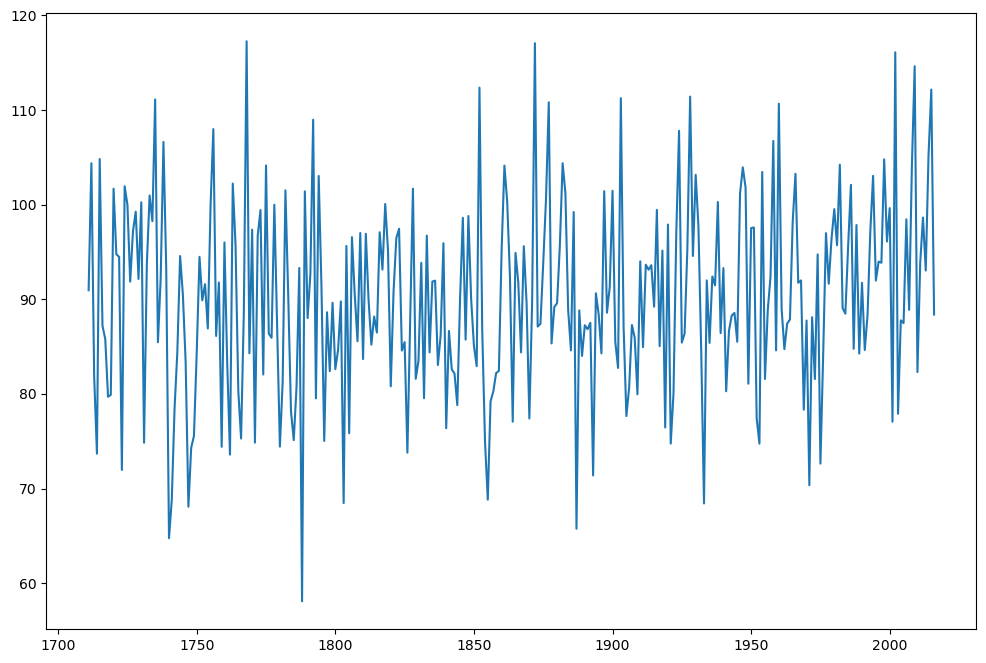

In [166]:
irish_rainfall_trend=irish_rain_annual.mean()

plt.figure(figsize=(12,8))
plt.plot(irish_rain_annual)
plt.show()

## 7. Export Fused Data <a id="export-data"></a>

In [ ]:
# Output the merged CO2, Temperature, CH4 data to  .csv and .json file 
# https://stackoverflow.com/questions/29271520/valueerror-dataframe-index-must-be-unique-for-orient-columns
#co2_merged.to_csv('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/co2_merged_data.csv', index=False)
#co2_merged.to_json('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/co2_merged_data.json', orient="split")

#temp_merged.to_csv('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/temp_merged_data.csv', index=False)
#temp_merged.to_json('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/temp_merged_data.json', orient="split")

#ch4_merged.to_csv('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/ch4_merged_data.csv', index=False)
#ch4_merged.to_json('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/ch4_merged_data.json', orient="split")

## Resources

https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13

https://xlrd.readthedocs.io/en/latest/

https://gml.noaa.gov/ccgg/trends/data.html

https://www.met.ie/climate/available-data/long-term-data-sets/

https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03

https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/


## Background Reading

https://www.ipcc.ch/site/assets/uploads/2018/03/srccs_chapter2-1.pdf

https://education.nationalgeographic.org/resource/paleoclimatology-RL/

https://icecores.org/about-ice-cores#:~:text=CO2%20in%20the%20Ice%20Core%20Record&text=Over%20400%2C000%20years%2C%20and%20even,to%20warmer%20in%20interglacial%20periods

https://gml.noaa.gov/ccgg/about/co2_measurements.html

https://factsonclimate.org/infographics/concentration-warming-relationship